# 

# Employee Attrition 



###  Problem statement: 
Employee attrition refers to the percentage of workers who leave an organization and are replaced by new employees. A high rate of attrition in an organization leads to increased recruitment, hiring and training costs. Not only it is costly, but qualified and competent replacements are hard to find.  The Attrition Prediction model estimates the attrition risk for your employee populations in real-time. The purpose of this case is to uncover the factors that lead to employee attrition and explore important drivers of employee attrition.




### Required Libraries 

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
from sklearn.model_selection import train_test_split
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,plot_precision_recall_curve,f1_score,accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier



font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

### Uploading Dataset 

In [16]:
data = pd.read_csv('attrition.csv')
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life_Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research_Development,8,Below_College,Life_Sciences,High,Male,...,Outstanding,Very_High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research_Development,2,College,Other,Very_High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research_Development,3,Master,Life_Sciences,Very_High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research_Development,2,Below_College,Medical,Low,Male,...,Excellent,Very_High,1,6,3,Better,2,2,2,2


###  Function to evaluate performance of Classification model

In [17]:
def evaluate(model, Y_test, X_test,X_train,Y_train): 
    
    # predict the target on the train dataset
    predict_train = model.predict(X_train)

    # Accuray Score on train dataset
    accuracy_train = accuracy_score(Y_train,predict_train)
    print('Accuracy Score on train dataset : ', round(accuracy_train,2))

    # predict the target on the test dataset
    predict_test = model.predict(X_test)

    # Accuracy Score on test dataset
    accuracy_test = accuracy_score(Y_test,predict_test)
    print('Accuracy_score on test dataset : ', round(accuracy_test,2), '\n')
    
    precision = precision_score(Y_test,  predict_test)
    recall = recall_score(Y_test,  predict_test)
    accuracy= accuracy_score(Y_test,  predict_test)
    F1_score= f1_score(Y_test,  predict_test)

    print('Model Performance')
    print('Precision: {}'.format(round(precision,2)))
    print('Recall: {}'.format(round(recall,2)))
    print('Accuracy:{}'.format(round(accuracy,2)))
    print('F1-score: : {}'.format(round(F1_score,2)),'\n')


### Hint: use below mentioned method to call classification 

In [18]:
# Add in random state
tree = DecisionTreeClassifier() # insteaed of DecisionTreeRegressor()
forest = RandomForestClassifier() # instead of RandomForestRegressor()
gbm = GradientBoostingClassifier() # instead of GradientBoostingRegressor()
xgbc = XGBClassifier()             #Instead of XGBRegresor()

# Questions

### 1.  Apply Proper Data Pre-Processign and EDA

In [19]:
data_transformed = data.copy(deep = True)
data_transformed = pd.get_dummies(data_transformed, columns=data_transformed.columns[data_transformed.dtypes=='object'], drop_first=True)
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 1470 non-null   int64
 1   DailyRate                           1470 non-null   int64
 2   DistanceFromHome                    1470 non-null   int64
 3   HourlyRate                          1470 non-null   int64
 4   JobLevel                            1470 non-null   int64
 5   MonthlyIncome                       1470 non-null   int64
 6   MonthlyRate                         1470 non-null   int64
 7   NumCompaniesWorked                  1470 non-null   int64
 8   PercentSalaryHike                   1470 non-null   int64
 9   StockOptionLevel                    1470 non-null   int64
 10  TotalWorkingYears                   1470 non-null   int64
 11  TrainingTimesLastYear               1470 non-null   int64
 12  YearsA

### 2. Split dataset to Trains and Test set (dont forget to set the seed)

In [20]:
#Split the data
X = data_transformed.loc[:,data_transformed.columns!='Attrition_Yes'].values
Y = data_transformed.loc[:, 'Attrition_Yes'].values

#Split the data into training and testing 
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### 3. Fit Tree Classifier to the Train set (tune paramters) and evaluate performance using evalute() function

In [35]:
tree_1 = DecisionTreeClassifier(random_state = 42)

# fit the model with the training data
tree_1.fit(X_train,Y_train)

evaluate(tree_1, Y_test, X_test,X_train,Y_train)


Accuracy Score on train dataset :  1.0
Accuracy_score on test dataset :  0.79 

Model Performance
Precision: 0.47
Recall: 0.43
Accuracy:0.79
F1-score: : 0.45 



In [36]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [20, 50, 80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5,10],
    'min_samples_split': [8, 10, 12 , 17],
    'random_state' : [2]
}

# Instantiate the grid search model
tree_cv = GridSearchCV(estimator = tree, param_grid = param_grid, scoring = 'recall', cv = 10, n_jobs = -1, verbose = 2)
tree_cv.fit(X_train, Y_train)
evaluate(tree_cv, Y_test, X_test,X_train,Y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Accuracy Score on train dataset :  0.92
Accuracy_score on test dataset :  0.79 

Model Performance
Precision: 0.45
Recall: 0.34
Accuracy:0.79
F1-score: : 0.39 



### 4. Fit Random Forest to the Train set (tune parameters) and evaluate performance using evalute() function

In [27]:
#Show the Confusion matrix and accaracy score for the model on the test data
forest = RandomForestClassifier(n_estimators=10, random_state = 42)
forest.fit(X_train, Y_train)

evaluate(forest, Y_test, X_test,X_train,Y_train)

Accuracy Score on train dataset :  0.98
Accuracy_score on test dataset :  0.82 

Model Performance
Precision: 0.88
Recall: 0.12
Accuracy:0.82
F1-score: : 0.21 



In [28]:
##### Parameter tunning RF
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'max_features': [2, 3,5, 10],
    'min_samples_split': [8, 10, 12],
    'random_state' : [2]
}
forest_cv = GridSearchCV(estimator = forest, param_grid = param_grid,  scoring = 'recall', cv = 10, n_jobs = -1, verbose = 2)
forest_cv.fit(X_train, Y_train)
evaluate(forest_cv, Y_test, X_test,X_train,Y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Accuracy Score on train dataset :  0.95
Accuracy_score on test dataset :  0.82 

Model Performance
Precision: 0.65
Recall: 0.19
Accuracy:0.82
F1-score: : 0.29 



In [29]:
forest_cv.best_params_ 

{'max_depth': 20,
 'max_features': 10,
 'min_samples_split': 8,
 'random_state': 2}

### 5. Fit GBM  model to the Train Set and evaluate performance using evalute() function

In [30]:
gbm = GradientBoostingClassifier(n_estimators=100, max_depth=5,random_state = 42)
gbm.fit(X_train, Y_train)
evaluate(gbm, Y_test, X_test,X_train,Y_train)

Accuracy Score on train dataset :  1.0
Accuracy_score on test dataset :  0.83 

Model Performance
Precision: 0.68
Recall: 0.26
Accuracy:0.83
F1-score: : 0.38 



In [31]:
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
     'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
     'random_state' : [2]
    }
gbm_cv = GridSearchCV(estimator = gbm, param_grid = param_grid, scoring = 'recall',cv = 2, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, Y_train)
evaluate(gbm_cv, Y_test, X_test,X_train,Y_train)

Fitting 2 folds for each of 70 candidates, totalling 140 fits
Accuracy Score on train dataset :  1.0
Accuracy_score on test dataset :  0.83 

Model Performance
Precision: 0.64
Recall: 0.28
Accuracy:0.83
F1-score: : 0.39 



### 6. Fit XGBoost  model to the Train Set and evaluate performance using evalute() function

In [33]:
xgbc = XGBClassifier(random_state = 42)
xgbc.fit(X_train, Y_train)
evaluate(xgbc, Y_test, X_test,X_train,Y_train)

[14:50:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score on train dataset :  1.0
Accuracy_score on test dataset :  0.83 

Model Performance
Precision: 0.65
Recall: 0.29
Accuracy:0.83
F1-score: : 0.4 



C:\Users\aidan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [34]:
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
     'max_depth': [1,2,3,4,5,10],
     'random_state' : [2]
    }

xgbc_cv = GridSearchCV(estimator = xgbc, param_grid = param_grid, scoring = 'recall',cv = 2, n_jobs = -1, verbose = 2)
xgbc_cv.fit(X_train, Y_train)
evaluate(xgbc_cv, Y_test, X_test,X_train,Y_train)

Fitting 2 folds for each of 42 candidates, totalling 84 fits
[14:50:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score on train dataset :  0.93
Accuracy_score on test dataset :  0.83 

Model Performance
Precision: 0.7
Recall: 0.28
Accuracy:0.83
F1-score: : 0.4 



C:\Users\aidan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### 7. Compare the performance of four developed models

When we attempt to maximize the recall of all 4 models, we see that the tree based model does the best job reducing the amount of false negatives relative to true positives. On the other hand, the random forest model had the lowest recall of 0.19. We want to do our best at reducing the number of employees that leave, and so we want to reduce our false negative (when we don't think someone will leave but they actually do leave). This means that our recall is most important in the comparison of the performance of the models. 

Overall, the XGBoost model unsurprisingly had the best F1-score and the random forest model had the worst f1-score. Because of the limitation of computing power, the XGBoost model is better under the constraint to maximize f1-score whereas we may see the random forest model improve if more computing power was available.

### 8. Is the data imbalance? Is it causing problem in your model(s)? which of them ? why?

In [37]:
print(data_transformed['Attrition_Yes'].value_counts(normalize=False),'\n')

print(data_transformed['Attrition_Yes'].value_counts(normalize=True))

0    1233
1     237
Name: Attrition_Yes, dtype: int64 

0    0.838776
1    0.161224
Name: Attrition_Yes, dtype: float64


Yes, there is a data imbalance as we can observe a large of employees stay with the company. Relatively, the number of employees that quit only make up 16% of the data leading to a large imbalance between those that stay and quit in the data. This data imbalance is likely affecting the precision and recall scores of the models. The random forest model although it had the lowest recall, has the highest precision which is likely due to the data imbalance.

### 9. Derive important features using the best performed model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


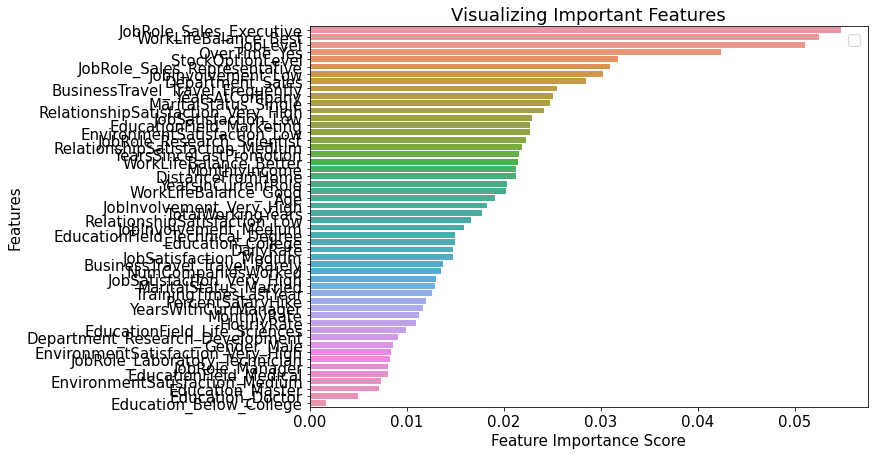

In [41]:
k=data_transformed.drop('Attrition_Yes', axis=1).columns
feature_imp = pd.Series(xgbc.feature_importances_,index=k).sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=feature_imp[feature_imp>0], y=feature_imp.index[feature_imp>0])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### 10. Add transparacy to your modeling results 

It seems as though factors of a person's job affect the attrition rate including unsurprisingly work life balance, if overtime is done, their job level. Someone with the best work life balance will most likely be negatively affecting attrition rate (best work life balance means they are less likely to quit). As well, the job level of a person contributes signifigantly with people in higher up positions staying for longer than entry-level positions.

On the other hand, education seems to be an unimportant feature in determining attrition rates.

### 11. Suggest proper solution to reduce the attrition rate.

To reduce attrition, employers have to ensure a decent worklife balance and not necessarily providing more compensation. Potentially making rules for work on weekend as well as limiting overtime work to maintain worklife balance for more employees. Simillarly, potentailly hiring more people so that the workload of each person is lower and everyone is able to have a decent worklife balance could help reduce attrition.